In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Lesson 2

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [8]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [9]:
X_st[1] = (X[1] - X1_mean) / X1_std

In [10]:
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [12]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [13]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if i % (iterations / 10) == 0:
        #    print(i, W, err)
    return W

1 Постройте график зависимости весов всех признаков от lambda в L2-регуляризации

In [14]:
lambdas = np.arange(1e-2, 10, 1)
weights = []
n_feats = X_st.shape[0]
alpha = 1e-2
iterations = 5000

for lambda_ in lambdas:
    W = eval_model_reg2(X_st, y, iterations, alpha, lambda_)
    weights.append(W)   

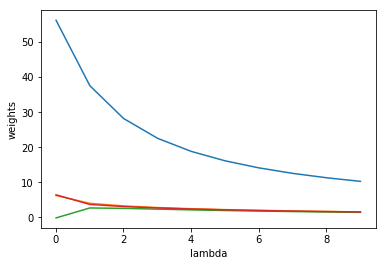

In [15]:
plt.plot(lambdas, weights)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

С ростом лямбда веса признаков зануляются

2 Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [17]:
def calc_std_normal_fit(x):
    res = (x - x.min()) / (x.max() - x.min())
    res = (res - res.mean()) / res.std()
    return res

In [18]:
calc_std_normal_fit(X[3])

array([-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
       -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064])

In [19]:
calc_std_fit(X[3])

array([-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
       -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064])

Применить одновременно стандартизацию и нормализацию на признак возможно, но это не приносит никакого результата

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации

In [20]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)

500 [53.80821107  5.5542428   1.53275777  5.12255251] 32.85608337990543
1000 [53.80952378  5.70466916  1.09946561  5.42237869] 32.590169320149954
1500 [53.80952381  5.72532529  1.00880579  5.49542037] 32.54458858091259
2000 [53.80952381  5.72945349  0.98915653  5.51158342] 32.53510519436449
2500 [53.80952381  5.73034197  0.9848759   5.51511491] 32.53305784819005
3000 [53.80952381  5.73053533  0.98394268  5.51588513] 32.53261238131542
3500 [53.80952381  5.73057748  0.9837392   5.51605308] 32.532515295901064
4000 [53.80952381  5.73058667  0.98369484  5.5160897 ] 32.53249412964209
4500 [53.80952381  5.73058868  0.98368517  5.51609768] 32.5324895146959
5000 [53.80952381  5.73058911  0.98368306  5.51609942] 32.532488508468425


array([53.80952381,  5.73058911,  0.98368306,  5.51609942])

## Lesson 3

In [23]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [25]:
X_st = X.copy()
X_st[2, :] = calc_std_fit(X[2, :])

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log

In [28]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 0, 1e-8, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [30]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [31]:
W = eval_model(X_st, y, iterations=6000, alpha=4.7)

600 [-31.0064962   -3.18339431  -8.30035052  25.57077581] 0.12157711198678005
1200 [-35.21713162  -3.55898729  -9.49134137  28.96408929] 0.11071772357943785
1800 [-38.69065134  -3.86734498 -10.47133616  31.75574131] 0.10328297287474317
2400 [-41.71423822  -4.13150001 -11.32672884  34.17464742] 0.09767307556278651
3000 [-44.42223999  -4.36374024 -12.09600577  36.33070213] 0.09319031251274155
3600 [-46.89755542  -4.57172756 -12.80265499  38.29177891] 0.0894584409785453
4200 [-49.19471373  -4.76056186 -13.46197311  40.10260553] 0.08625572280851902
4800 [-51.35134301  -4.93382166 -14.0844055   41.79414893] 0.08344247085885012
5400 [-53.39437873  -5.09413268 -14.67733855  43.38869532] 0.08092603303060693
6000 [-55.34365941  -5.2434977  -15.24613231  44.90278859] 0.07864239793377792


Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1

In [32]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred_proba


In [33]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([3.20948890e-01, 8.77271658e-04, 1.00000000e+00, 1.58538910e-11,
       9.78043065e-01, 7.11422488e-03, 1.00000000e+00, 4.97506518e-03,
       6.94806188e-01, 1.00000000e+00])

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred

In [34]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba < 0.5, 0, 1) # Порог
    return y_pred

In [35]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [37]:
def confusion_matrix(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(y.shape[0]):
        if y[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y[i] == 1 and y_pred[i] == 0:
            FN += 1
        elif y[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            TN += 1
    return TP, FP, FN, TN 

In [38]:
TP, FP, FN, TN = confusion_matrix(y, y_pred)
TP, FP, FN, TN

(5, 0, 0, 5)

In [39]:
def accuracy(TP, FP, FN, TN):
    return (TP + TN) / (TP + FP + FN + TN)

def precision(TP, FP):
    return TP / (TP + FP)

def recall(TP, FN):
    return TP / (TP + FN)

def f2_score(TP, FP, FN):
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return (2 * precision * recall) / (precision + recall)

In [42]:
print(f'''accuracy = {accuracy(TP, FP, FN, TN)},
precision = {precision(TP, FP)},
recall = {recall(TP, FN)},
f2_score = {f2_score(TP, FP, FN)}''')

accuracy = 1.0,
precision = 1.0,
recall = 1.0,
f2_score = 1.0


Имеется переобучение так как модель подстроилась под обучающую выборку. Все показатели оценки модели равна 100%

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [47]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W**2)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [48]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [55]:
W1 = eval_model_reg1(X_st, y, 5000, alpha=1e-2)

500 [ 0.04336177 -0.70630382  0.83061356  1.29265719] 0.4929420479573742
1000 [-0.15418119 -0.72505978  0.89912268  1.40046976] 0.4797773967260534
1500 [-0.31966101 -0.7478229   0.90866214  1.52078173] 0.4699735796890773
2000 [-0.4766838  -0.76605669  0.89398508  1.63511842] 0.4614014083903252
2500 [-0.63090915 -0.77924734  0.86625369  1.74137068] 0.45359987382338407
3000 [-0.78372464 -0.78832188  0.83015463  1.84073361] 0.44635373411546625
3500 [-0.93547136 -0.79426692  0.78825736  1.93472918] 0.439537665272863
4000 [-1.08622935 -0.79788383  0.74223502  2.02463175] 0.4330734044497408
4500 [-1.23601345 -0.79978568  0.6932726   2.11142244] 0.42690979613625946
5000 [-1.38482363 -0.80043499  0.64224101  2.19584165] 0.4210119599058861


In [57]:
W2 = eval_model_reg2(X_st, y, 5000, alpha=1e-2)

500 [ 0.05299544 -0.70175225  0.83623892  1.27725289] 0.4936474099935915
1000 [-0.13557702 -0.71678981  0.90397803  1.37253144] 0.4813875173855579
1500 [-0.28466294 -0.73526049  0.91267439  1.47583411] 0.4726932252558685
2000 [-0.42033354 -0.74841027  0.89875734  1.56867344] 0.46541019665662897
2500 [-0.54954937 -0.75601807  0.87334643  1.65017201] 0.4590333999803763
3000 [-0.6748411  -0.75924093  0.84082802  1.72261656] 0.453295720930366
3500 [-0.7976655  -0.75918183  0.80340951  1.78837511] 0.44802514965473367
4000 [-0.91919092 -0.75667388  0.76236068  1.84938488] 0.44310335940337797
4500 [-1.04050201 -0.75230479  0.71842771  1.90717042] 0.43844511275881237
5000 [-1.1626725  -0.74647324  0.67201177  1.96294536] 0.4339866683338265


In [61]:
y_pred = calc_pred(W2, X_st)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [62]:
TP, FP, FN, TN = confusion_matrix(y, y_pred)
print(f'''accuracy = {accuracy(TP, FP, FN, TN)},
precision = {precision(TP, FP)},
recall = {recall(TP, FN)},
f2_score = {f2_score(TP, FP, FN)}''')

accuracy = 0.8,
precision = 0.8,
recall = 0.8,
f2_score = 0.8000000000000002
